In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('penguins.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [5]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
df.tail()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE
343,49.9,16.1,213.0,5400.0,MALE


In [7]:
df.shape

(344, 5)

In [8]:
df.nunique()

culmen_length_mm     164
culmen_depth_mm       80
flipper_length_mm     57
body_mass_g           94
sex                    3
dtype: int64

In [9]:
df.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [10]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [11]:
def detout(df, col):
  q1 = df[col].quantile(0.25)
  q2 = df[col].quantile(0.75)
  iqr = q2-q1
  lb = q1-1.5*iqr
  ub = q2+1.5*iqr
  outlier = df[((df[col] < lb) | (df[col] > ub))]
  return outlier

numeric_col = df.select_dtypes(include=[np.number])
for col in numeric_col:
  print(col)
  outlier = detout(df, col)
  if outlier.empty:
    print('no outlier')
  else:
    print(outlier[[col]])
  print('')

culmen_length_mm
no outlier

culmen_depth_mm
no outlier

flipper_length_mm
    flipper_length_mm
9              5000.0
14             -132.0

body_mass_g
no outlier



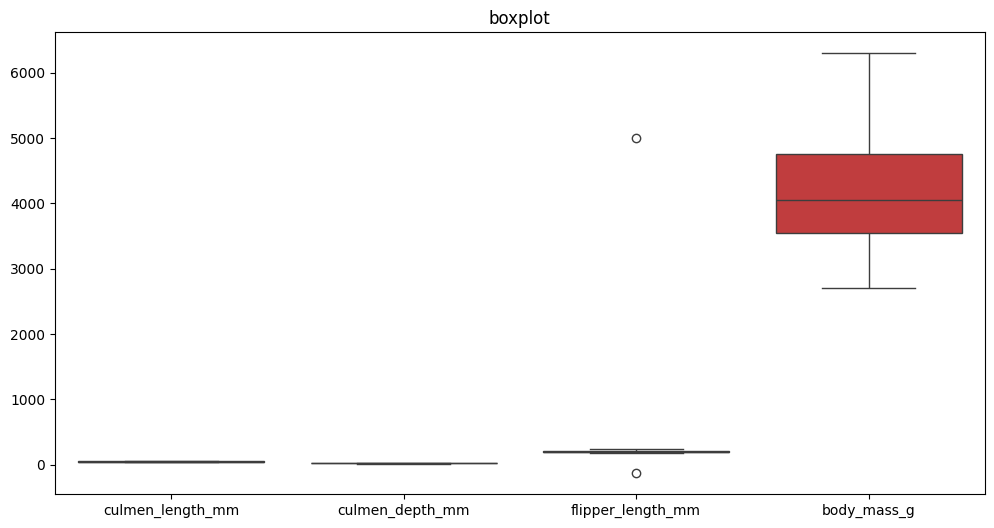

In [12]:
plt.figure(figsize = (12,6))

sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title('boxplot')
plt.show()

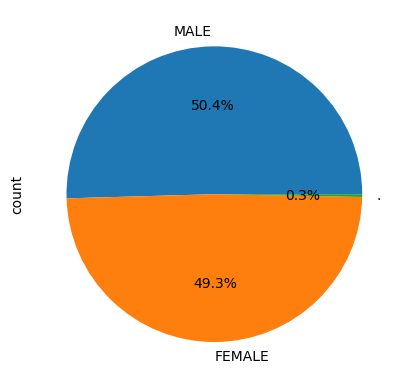

In [13]:
ax = df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

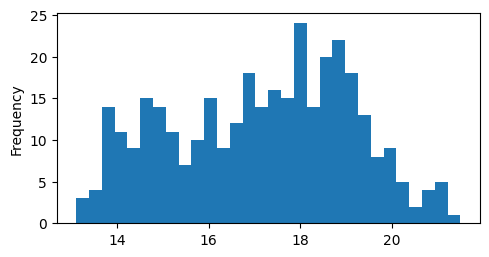

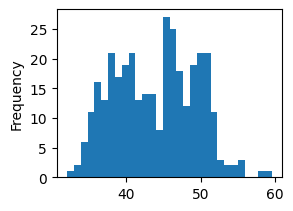

In [14]:
plt.figure(figsize = (12,6))

plt.subplot(2, 2, 1)
ax = df['culmen_depth_mm'].plot(kind='hist', bins = 30)
plt.show()

plt.subplot(2, 2, 2)
ax = df['culmen_length_mm'].plot(kind='hist', bins = 30)
plt.show()

In [15]:
df.isnull().sum()

df['culmen_length_mm'] = df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [16]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [17]:
outlier = detout(df, 'flipper_length_mm')
print(outlier)

    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
9               42.0             20.2             5000.0       4250.0  MALE
14              34.6             21.1             -132.0       4400.0  MALE


In [18]:
df = df.drop([9, 14])

In [19]:
df.shape

(342, 5)

In [20]:
df.nunique()

culmen_length_mm     165
culmen_depth_mm       80
flipper_length_mm     56
body_mass_g           95
sex                    3
dtype: int64

In [21]:
for col in df.columns:
  if df[col].dtypes == 'object':
    print(col)
    print(df['sex'].unique())

sex
['MALE' 'FEMALE' '.']


In [22]:
df = df[df['sex'] != '.']

In [23]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [24]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform = 'pandas')
sex_col = encoder.fit_transform(df[['sex']])
df = df.drop(columns='sex')
df = pd.concat([df, sex_col], axis=1)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.10000,18.70000,181.00000,3750.000000,0.0,1.0
1,39.50000,17.40000,186.00000,3800.000000,1.0,0.0
2,40.30000,18.00000,195.00000,3250.000000,1.0,0.0
3,43.92193,17.15117,214.01462,4201.754386,0.0,1.0
4,36.70000,19.30000,193.00000,3450.000000,1.0,0.0


In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(df)
df_preprocess = pd.DataFrame(data=x, columns=df.columns)
df_preprocess.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.892951,0.800733,-1.421738,-0.560589,-0.968246,0.968246
1,-0.819355,0.135628,-1.066044,-0.498171,1.032796,-1.032796
2,-0.672161,0.442599,-0.425796,-1.184774,1.032796,-1.032796
3,-0.005755,0.008322,0.926881,0.003367,-0.968246,0.968246
4,-1.334532,1.107704,-0.568073,-0.935100,1.032796,-1.032796


In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
df_pca = pca.fit(df_preprocess)
n_components = sum(df_pca.explained_variance_ratio_ > 0.1)
print(n_components)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_preprocess)

2


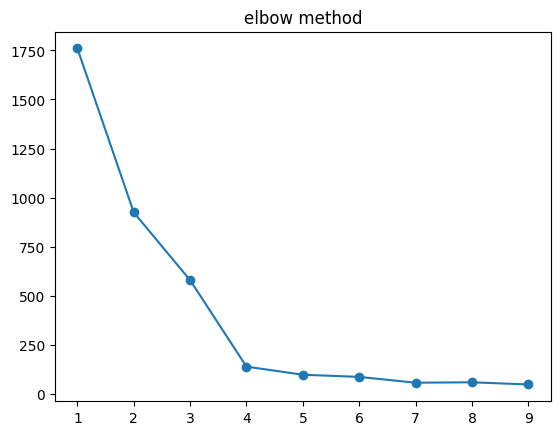

In [27]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 10):
  kmeans = KMeans(n_clusters=k, random_state=42).fit(df_pca)
  inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('elbow method')
plt.show()

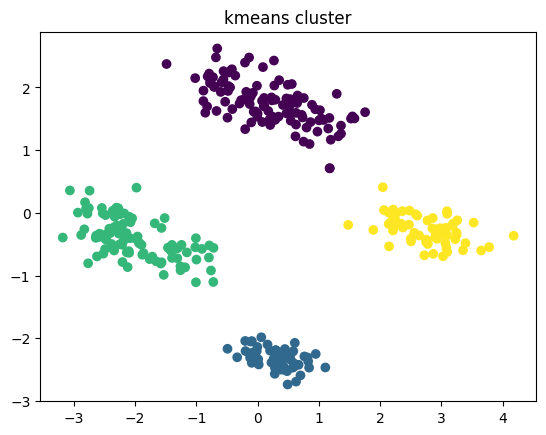

In [28]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(df_pca)

plt.scatter(df_pca[:, 0], df_pca[:, 1], c = kmeans.labels_, cmap='viridis')
plt.title('kmeans cluster')
plt.show()

In [29]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.6, min_samples=10).fit(df_pca)
db_cluster = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print(db_cluster)

4


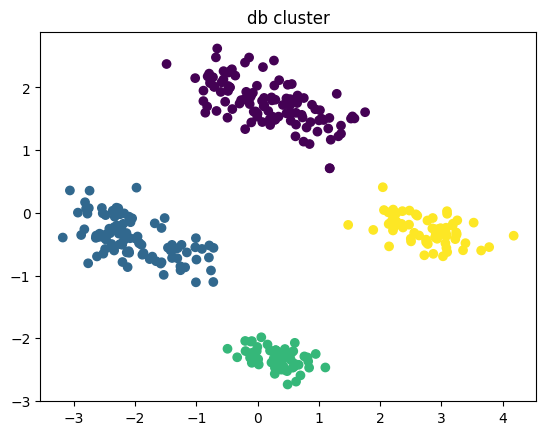

In [30]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c = db.labels_, cmap='viridis')
plt.title('db cluster')
plt.show()

In [31]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit(df_pca)

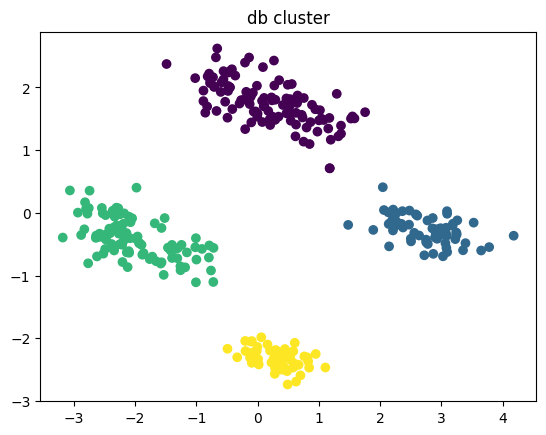

In [32]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c = hc.labels_, cmap='viridis')
plt.title('db cluster')
plt.show()